In [1]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [2]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [3]:
df["Date"] = pd.to_datetime(df["Date"])

In [4]:
weekly_sales = df.groupby('Date')['Weekly_Sales'].sum()
weekly_sales.head()

,Weekly_Sales
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30


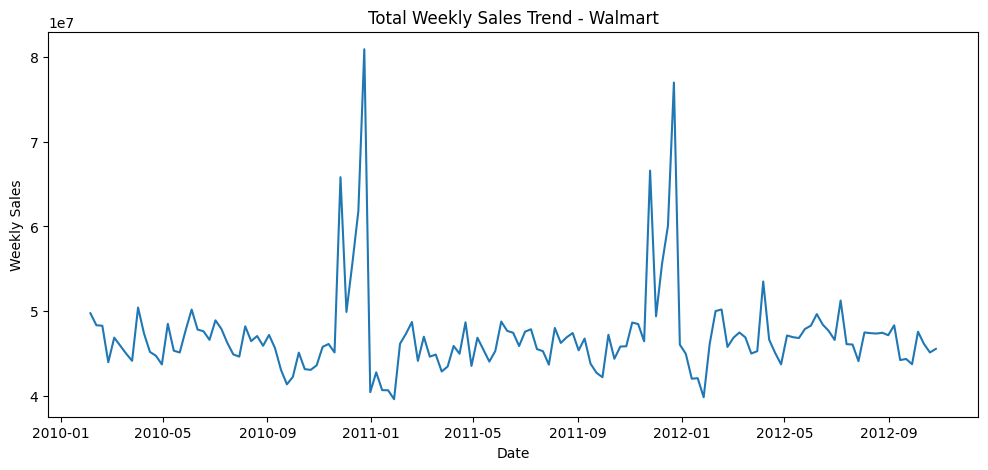

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(weekly_sales)
plt.title("Total Weekly Sales Trend - Walmart")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.show()

In [6]:
monthly_sales = weekly_sales.resample('M').sum()
monthly_sales.head()

/tmp/ipython-input-3669575036.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = weekly_sales.resample('M').sum()


,Weekly_Sales
Date,
2010-02-28,1.903330e+08
2010-03-31,1.819198e+08
2010-04-30,2.314124e+08
2010-05-31,1.867109e+08
2010-06-30,1.922462e+08


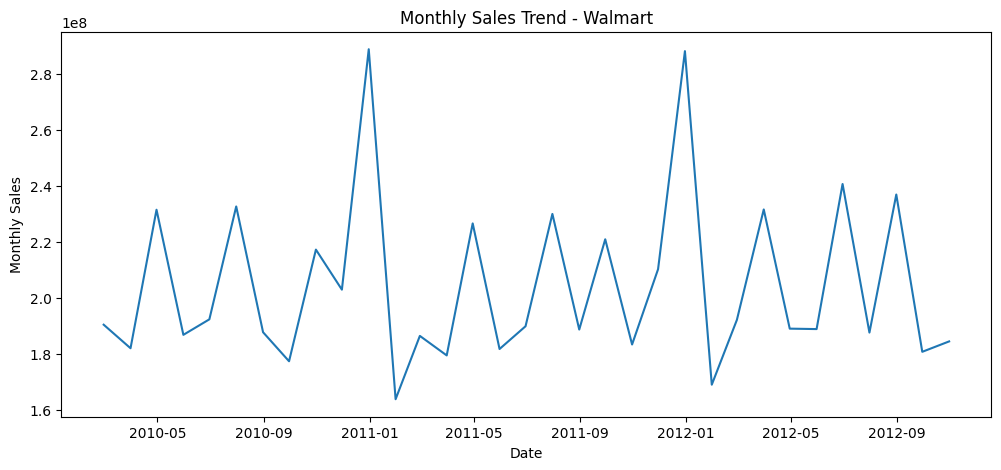

In [7]:
plt.figure(figsize=(12,5))
plt.plot(monthly_sales)
plt.title("Monthly Sales Trend - Walmart")
plt.xlabel("Date")
plt.ylabel("Monthly Sales")
plt.show()

In [9]:
train_size = int(len(monthly_sales) * 0.8)

train = monthly_sales[:train_size]
test = monthly_sales[train_size:]

In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train, trend='add', seasonal=None)
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(test))

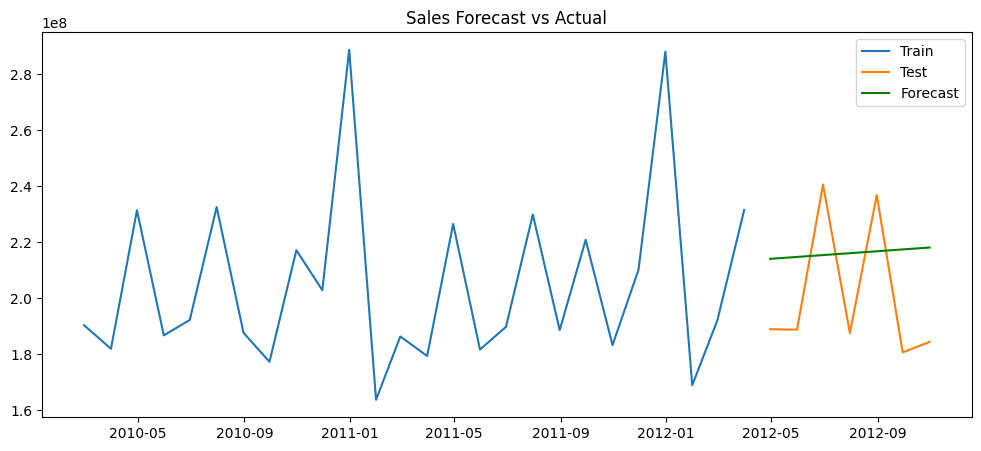

In [11]:
plt.figure(figsize=(12,5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Forecast', color='green')
plt.legend()
plt.title("Sales Forecast vs Actual")
plt.show()

In [12]:
from sklearn.metrics import mean_absolute_error
import numpy as np

mae = mean_absolute_error(test, forecast)
mape = np.mean(np.abs((test - forecast) / test)) * 100

print("MAE:", mae)
print("MAPE:", mape)

MAE: 27928837.479289092
MAPE: 14.274814050803904


In [13]:
future_forecast = model_fit.forecast(steps=3)
print(future_forecast)

2012-04-30    2.140637e+08
2012-05-31    2.147363e+08
2012-06-30    2.154090e+08
Freq: ME, dtype: float64


The Exponential Smoothing model achieved a Mean Absolute Percentage Error (MAPE) of 14.27%, indicating good forecasting accuracy. The model captures the overall trend in monthly sales effectively.

